In [1]:
import numpy as np
import scipy.io as sio
from os import listdir
from os.path import isfile, join
import seaborn.apionly as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

%matplotlib inline  

/Users/Brayan/anaconda/lib/python2.7/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
HOG_PATH = 'HOG_01'

hog_files = [f for f in listdir(HOG_PATH) if isfile(join(HOG_PATH, f))]
print hog_files

['00000-dataset.mat', '00001-dataset.mat', '00002-dataset.mat', '00003-dataset.mat', '00004-dataset.mat', '00005-dataset.mat', '00006-dataset.mat', '00007-dataset.mat', '00008-dataset.mat', '00009-dataset.mat', '00010-dataset.mat', '00011-dataset.mat', '00012-dataset.mat', '00013-dataset.mat', '00014-dataset.mat', '00015-dataset.mat', '00016-dataset.mat', '00017-dataset.mat', '00018-dataset.mat', '00019-dataset.mat', '00020-dataset.mat', '00021-dataset.mat', '00022-dataset.mat', '00023-dataset.mat', '00024-dataset.mat', '00025-dataset.mat', '00026-dataset.mat', '00027-dataset.mat', '00028-dataset.mat', '00029-dataset.mat', '00030-dataset.mat', '00031-dataset.mat', '00032-dataset.mat', '00033-dataset.mat', '00034-dataset.mat', '00035-dataset.mat', '00036-dataset.mat', '00037-dataset.mat', '00038-dataset.mat', '00039-dataset.mat', '00040-dataset.mat', '00041-dataset.mat', '00042-dataset.mat']


In [3]:
label = 1
dataset = np.empty((0, 1568))
labels = np.empty((0, 1))

for file_name in hog_files:
    print 'Dataset shape:', dataset.shape
    print 'Labels shape:', labels.shape
    print 'Opening file:', join(HOG_PATH, file_name)

    mat_contents = sio.loadmat(join(HOG_PATH, file_name))
    dataset = np.concatenate((dataset, np.array(mat_contents['dataset'])), axis = 0)
    labels = np.concatenate((labels, np.ones((mat_contents['dataset'].shape[0], 1)) * label), axis = 0)
    
    label += 1

Dataset shape: (0, 1568)
Labels shape: (0, 1)
Opening file: HOG_01/00000-dataset.mat
Dataset shape: (210, 1568)
Labels shape: (210, 1)
Opening file: HOG_01/00001-dataset.mat
Dataset shape: (2430, 1568)
Labels shape: (2430, 1)
Opening file: HOG_01/00002-dataset.mat
Dataset shape: (4680, 1568)
Labels shape: (4680, 1)
Opening file: HOG_01/00003-dataset.mat
Dataset shape: (6090, 1568)
Labels shape: (6090, 1)
Opening file: HOG_01/00004-dataset.mat
Dataset shape: (8070, 1568)
Labels shape: (8070, 1)
Opening file: HOG_01/00005-dataset.mat
Dataset shape: (9930, 1568)
Labels shape: (9930, 1)
Opening file: HOG_01/00006-dataset.mat
Dataset shape: (10350, 1568)
Labels shape: (10350, 1)
Opening file: HOG_01/00007-dataset.mat
Dataset shape: (11790, 1568)
Labels shape: (11790, 1)
Opening file: HOG_01/00008-dataset.mat
Dataset shape: (13200, 1568)
Labels shape: (13200, 1)
Opening file: HOG_01/00009-dataset.mat
Dataset shape: (14670, 1568)
Labels shape: (14670, 1)
Opening file: HOG_01/00010-dataset.mat

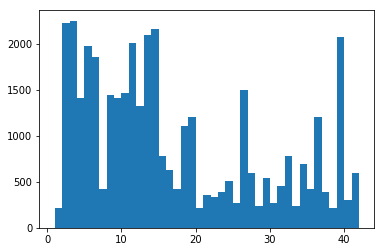

In [12]:
plt.hist(labels, bins = range(1, len(np.unique(labels))))
plt.show()

In [13]:
train_data, test_data, train_labels, test_labels = train_test_split(dataset, labels, train_size = 0.85, random_state = 0)

print 'Train:' + str(train_data.shape[0])
print 'Test:' + str(test_data.shape[0])

/Users/Brayan/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train:33327
Test:5882


In [14]:
scaler = preprocessing.StandardScaler().fit(train_data)
train_data_scaled = scaler.transform(train_data)

svm_model = svm.SVC(kernel = 'rbf', verbose = True)
svm_model.fit(train_data_scaled, train_labels)

/Users/Brayan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [16]:
test_data_scaled = scaler.transform(test_data)
predictions = svm_model.predict(test_data_scaled)
predictions = np.reshape(predictions, (predictions.shape[0], 1)) 

print 'Accuracy:', (sum(predictions == test_labels)[0] * 1.0) / test_labels.shape[0]

 Accuracy: 0.990649438966


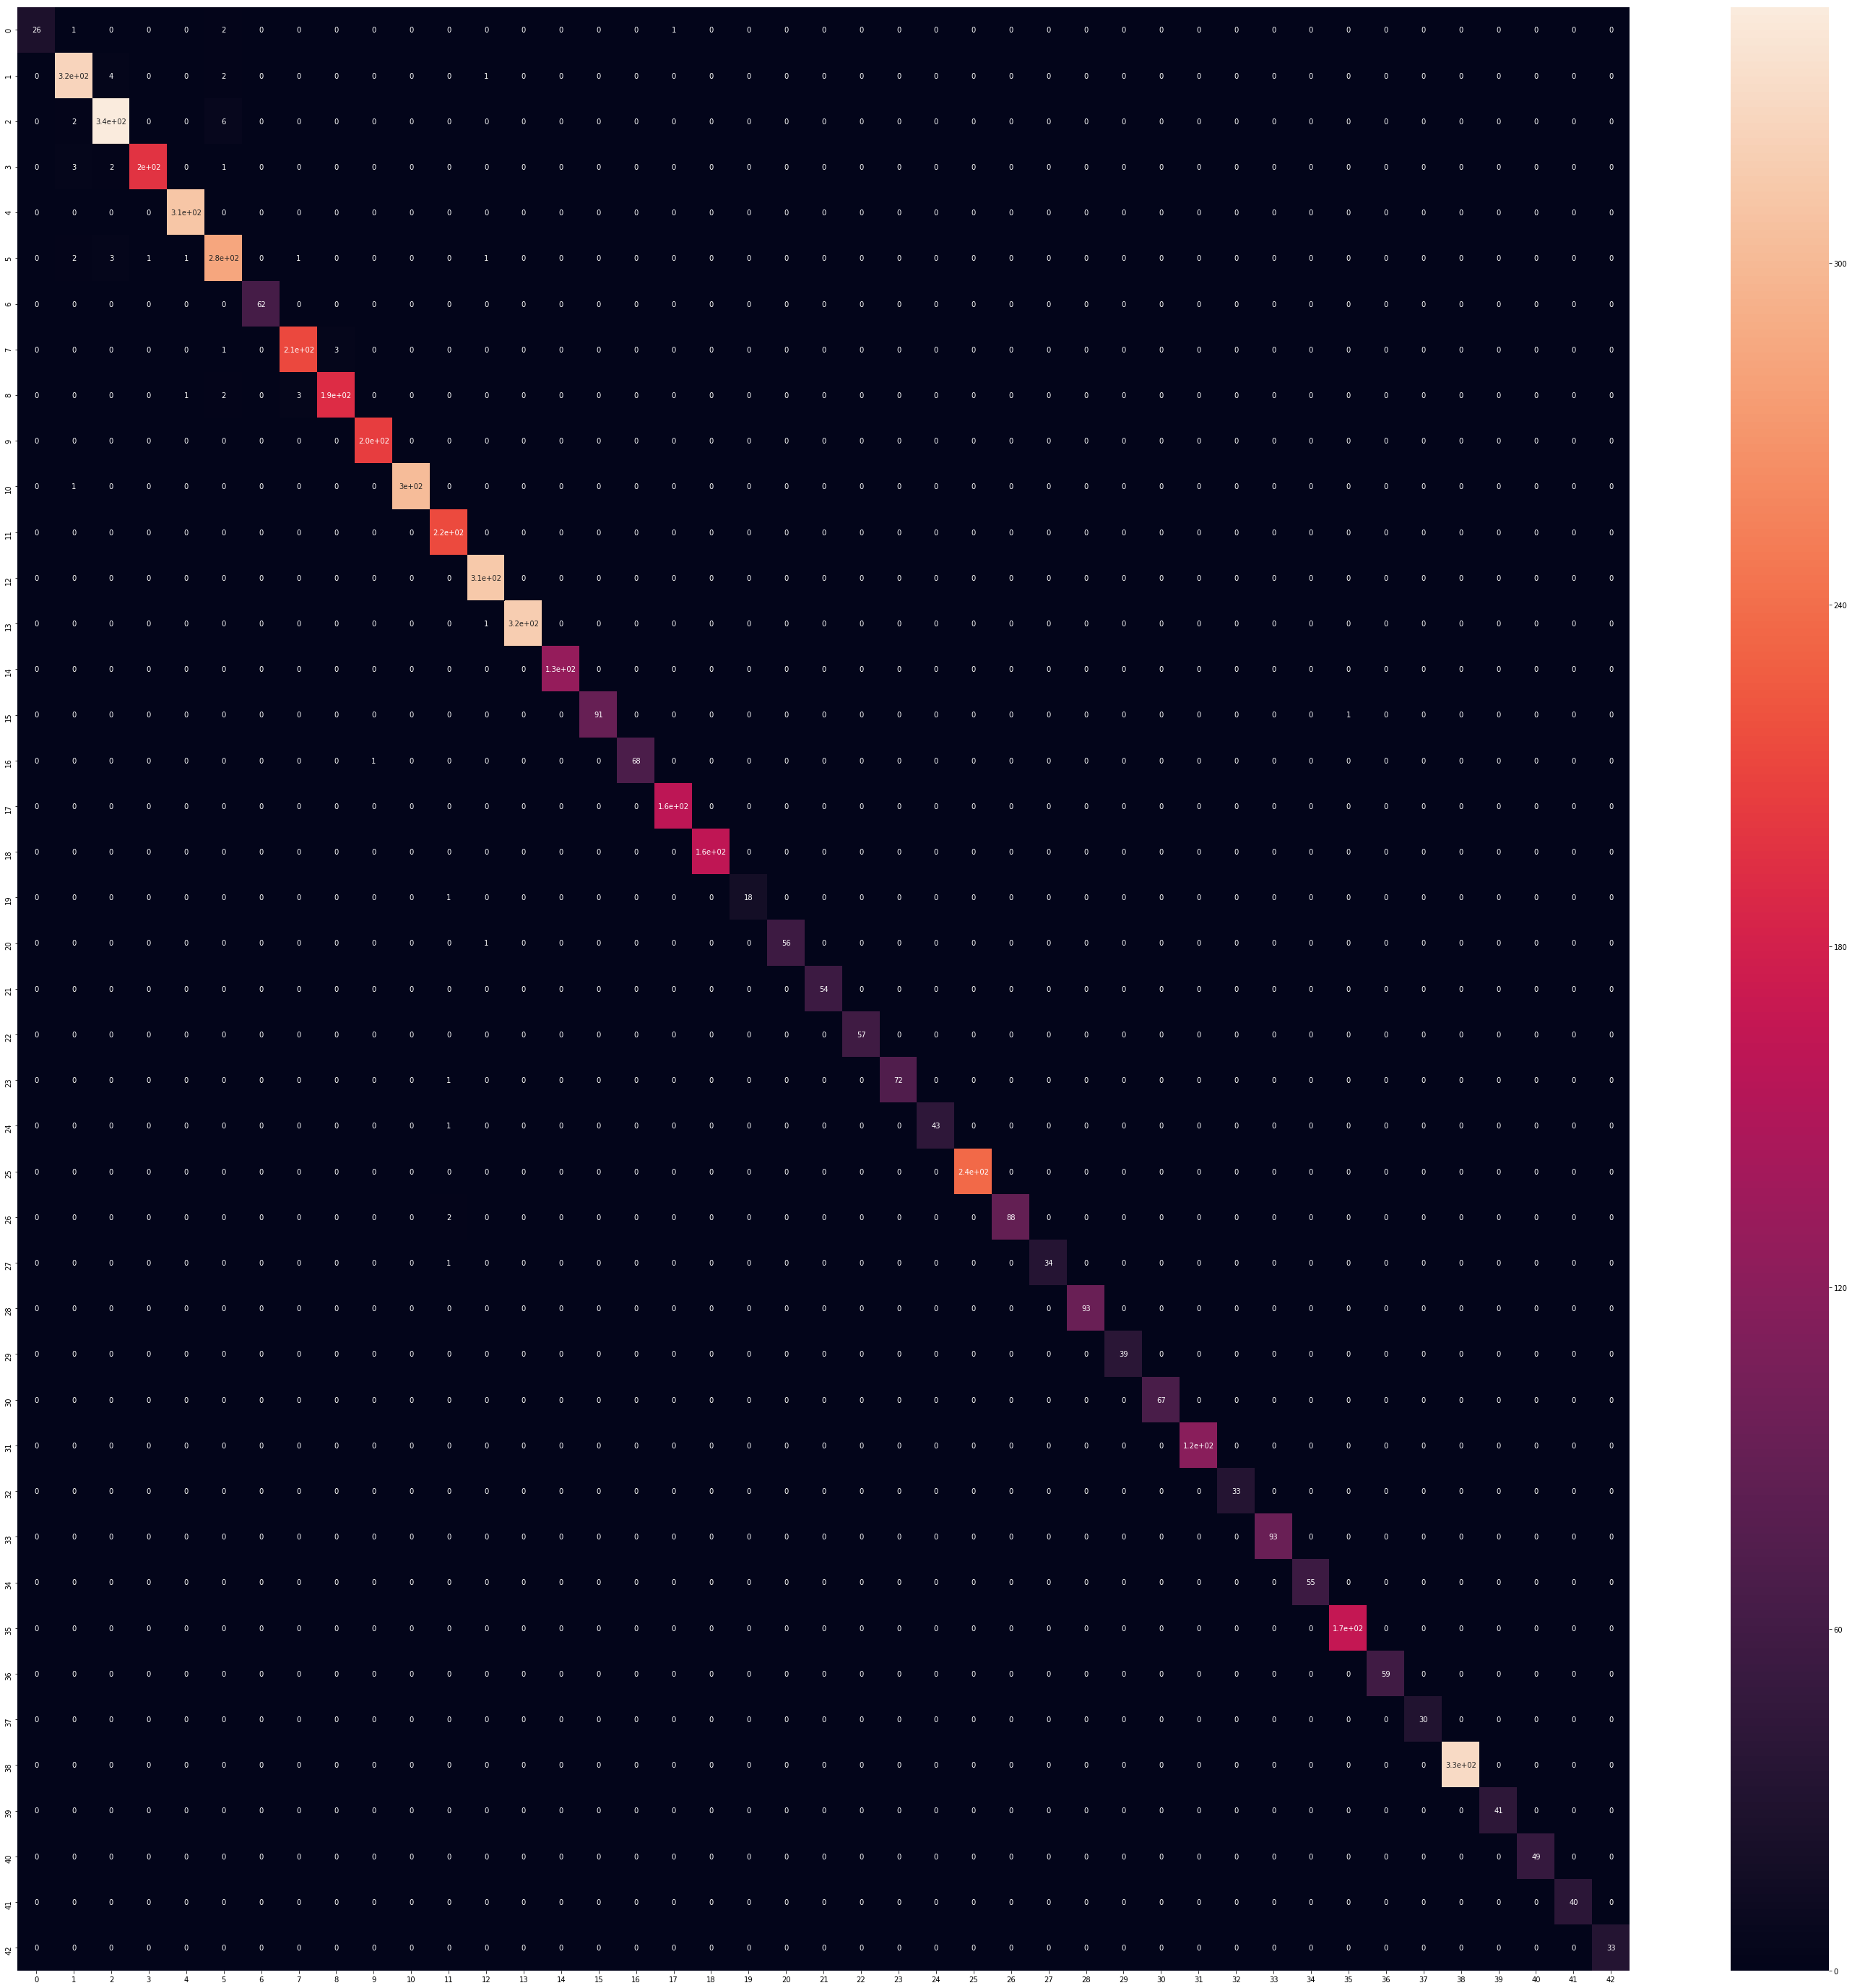

In [17]:
conf_array = confusion_matrix(test_labels, predictions)

plt.figure(figsize = (50, 50))
sn.heatmap(conf_array, annot=True)